In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.set_style('whitegrid')
# from google.colab import drive
# drive.mount('/content/drive')

** Nome: Dayvison Gomes de Oliveira.

**Treinando um Classificador de Produto com Redes Neurais**

O conjunto de dados abaixo consiste em reclamações de clientes a cerca de produtos/serviços oferecidos em uma instituição bancária. 

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/Attenty/Bolsistas/Tarefa Bolsistas - Ciência dos dados/Gabarito/customer-issues.csv')
display(d.head())

,date-received,product,sub-product,issue,sub-issue,consumer-message,state,zip-code,tags,via,resolution,timely-response?,disputed?,complaint-id
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,AL,352XX,NaN,Web,Closed with explanation,Yes,No,2141773
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,PA,177XX,Older American,Web,Closed with explanation,Yes,No,2163100
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,VA,224XX,NaN,Web,Closed with explanation,Yes,No,1420702
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,TX,752XX,NaN,Web,Closed with explanation,Yes,Yes,1772196
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,NE,693XX,NaN,Web,Closed with explanation,Yes,Yes,1790634


Exibindo as quatro primeiras mensagens

In [ ]:
print(*d.loc[:4, 'consumer-message'], sep='\n\n')

I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements

I purchased a new car on XXXX XXXX. The car dealer called Citizens Bank to get a 10 day payoff on my loan, good till XXXX XXXX. The dealer sent the check the next day. When I balanced my checkbook on XXXX XXXX. I noticed that Citizens bank had taken the automatic payment out of my checking account at XXXX XXXX XXXX Bank. I called Citizens and they stated that they did not close the loan until XXXX XXXX. ( stating that they did not receive the check until XXXX. XXXX. ). I told them that I did not believe that the check took that long to arrive. XXXX told me a check was issued to me for the amount overpaid, they deducted additional interest. Today ( XXXX XXXX, ) I called Citizens Bank again and talked to a supervisor named XXXX, because on XXXX XXXX. I received a letter that the loan had b

Abaixo temos o gráfico de frequências de produto sobre as conversas. Observa-se que este é um problema extremamente desbalanceado. Há, entretanto, amostras suficientes para a modelagem de um classificador de produtos levando em consideração o diálogo do cliente. **Para isso, selecione as seis classes de produto mais frequentes do dataset e descarte o restante das amostras**. Em seguida, **treine uma rede neural de sua escolha** para classificar produtos baseado nos comentários dos clientes. 

In [ ]:
def frequencies(dataset, column):
    labels, counts = np.unique(dataset[column], return_counts=True)
    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]
    
    (sns
     .barplot([l[:40] for l in labels], counts)
     .set_title(f'Occurrences for The {len(labels)} Classes in {column}'))
    plt.xticks(rotation=90)
    
    return labels, counts

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


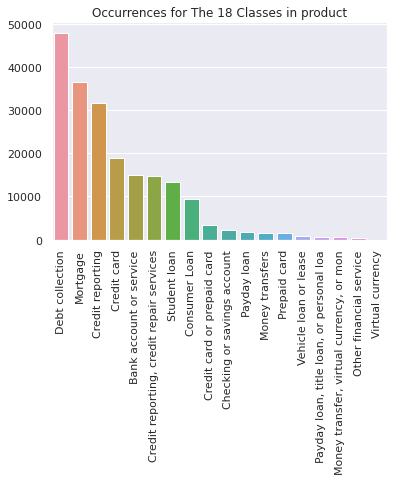

In [ ]:
labels, counamts = frequencies(d, 'product')

**Observações**: 
*   Para esta tarefa você deve utilizar o Pytorch.
*   Reporte todas as escolhas e observações que achar necessárias neste notebook. Todos os comentários e escolhas de projeto serão levadas em consideração no momento da seleção.
* As mensagens contidas no conjunto de dados possuem uma relação temporal por isso é importante realizar a separação dos sub-conjuntos de treino/teste respeitando esta relação, de forma a garantir que o modelo não seja treinado sobre amostras no futuro e experimentado sobre o passado.
* Só serão aceitas respostas entregues neste notebook.
* Entregue o notebook com o modelo treinado.
* Todo o pré-processamento dos dados e processo de separação é da escolha do cientista de dados. 
* Você pode treinar mais de um modelo e comparar resultados também, fique a vontade para escolher as melhores estratégias.
* Lembre de computar a acurácia balanceada e a matriz de confusão sobre o conjunto de teste.

In [2]:
# df = pd.read_csv('/content/drive/MyDrive/customer-issues.csv')
df = pd.read_csv('customer-issues.csv')

In [3]:
df.head()

,date-received,product,sub-product,issue,sub-issue,consumer-message,state,zip-code,tags,via,resolution,timely-response?,disputed?,complaint-id
0,10/1/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,AL,352XX,NaN,Web,Closed with explanation,Yes,No,2141773
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,PA,177XX,Older American,Web,Closed with explanation,Yes,No,2163100
2,6/15/2015,Credit reporting,NaN,Credit reporting company's investigation,Inadequate help over the phone,An account on my credit report has a mistaken ...,VA,224XX,NaN,Web,Closed with explanation,Yes,No,1420702
3,2/3/2016,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,This company refuses to provide me verificatio...,TX,752XX,NaN,Web,Closed with explanation,Yes,Yes,1772196
4,2/17/2016,Debt collection,Credit card,Improper contact or sharing of info,Talked to a third party about my debt,This complaint is in regards to Square Two Fin...,NE,693XX,NaN,Web,Closed with explanation,Yes,Yes,1790634


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199970 entries, 0 to 199969
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date-received     199970 non-null  object
 1   product           199970 non-null  object
 2   sub-product       147788 non-null  object
 3   issue             199970 non-null  object
 4   sub-issue         113532 non-null  object
 5   consumer-message  199970 non-null  object
 6   state             199407 non-null  object
 7   zip-code          199389 non-null  object
 8   tags              33446 non-null   object
 9   via               199970 non-null  object
 10  resolution        199970 non-null  object
 11  timely-response?  199970 non-null  object
 12  disputed?         164121 non-null  object
 13  complaint-id      199970 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 21.4+ MB


Pegando somente as colunas de interesse

In [5]:
df_ = df[['consumer-message','product','date-received']]

In [6]:
df_

,consumer-message,product,date-received
0,I have outdated information on my credit repor...,Credit reporting,10/1/2016
1,I purchased a new car on XXXX XXXX. The car de...,Consumer Loan,10/17/2016
2,An account on my credit report has a mistaken ...,Credit reporting,6/15/2015
3,This company refuses to provide me verificatio...,Debt collection,2/3/2016
4,This complaint is in regards to Square Two Fin...,Debt collection,2/17/2016
...,...,...,...
199965,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,Debt collection,11/9/2016
199966,"On XXXX/XXXX/13, without my authorization, Ban...",Bank account or service,1/22/2016
199967,I had an account with XXXX in XX/XX/XXXX this ...,Debt collection,2/7/2017
199968,I was contacted on XX/XX/XXXX email by XXXX fr...,Mortgage,1/4/2017


In [7]:
labels, counts = np.unique(df_['product'], return_counts=True)
p = np.argsort(counts)[::-1]
labels, counts = labels[p], counts[p]

In [8]:
labels_six = labels[:6]

In [9]:
labels_six

array(['Debt collection', 'Mortgage', 'Credit reporting', 'Credit card',
       'Bank account or service',
       'Credit reporting, credit repair services, or other personal consumer reports'],
      dtype=object)

Filtrando para as 6 maiores classes

In [10]:
new_df = df_[df_['product'].isin(labels_six)]

In [11]:
np.unique(new_df['product'], return_counts=True)[0].shape

(6,)

In [12]:
new_df

,consumer-message,product,date-received
0,I have outdated information on my credit repor...,Credit reporting,10/1/2016
2,An account on my credit report has a mistaken ...,Credit reporting,6/15/2015
3,This company refuses to provide me verificatio...,Debt collection,2/3/2016
4,This complaint is in regards to Square Two Fin...,Debt collection,2/17/2016
5,Started the refinance of home mortgage process...,Mortgage,11/18/2016
...,...,...,...
199965,Our son was taken to XXXX XXXX XXXX XXXX XXXX ...,Debt collection,11/9/2016
199966,"On XXXX/XXXX/13, without my authorization, Ban...",Bank account or service,1/22/2016
199967,I had an account with XXXX in XX/XX/XXXX this ...,Debt collection,2/7/2017
199968,I was contacted on XX/XX/XXXX email by XXXX fr...,Mortgage,1/4/2017


<AxesSubplot:xlabel='product', ylabel='count'>

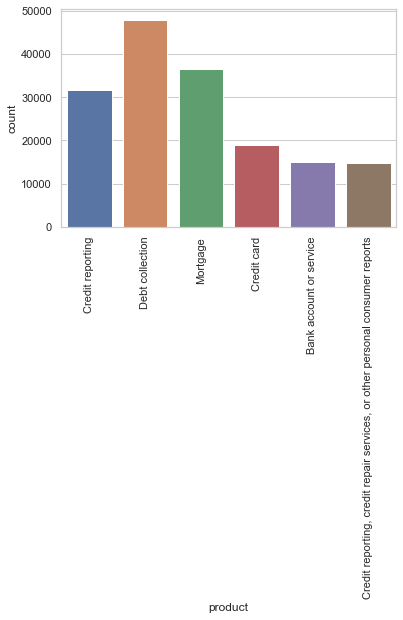

In [13]:
plt.xticks(rotation=90)
sns.countplot(data=new_df, x='product')

## Utilizando RNN

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
import gensim.downloader
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem import WordNetLemmatizer
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import random
from nltk.corpus import wordnet
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import TensorDataset

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dayvison\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dayvison\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dayvison\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dayvison\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Utilizei o word2vec para a transformação das frases em vetores númericos, e utilizo os pesos como parâmetro na camada de Embedding.

In [15]:
w2vec = gensim.downloader.load('word2vec-google-news-300')

In [16]:
w2v_weights = w2vec.vectors

Tentei utilizar o undersampler mas não ajudou e estou perdendo informações relevantes por conta do fator temporal

In [17]:
# rus = RandomUnderSampler()
# X_resampled, y_resampled = rus.fit_resample(new_df.drop(columns=['product']), new_df['product'])
# df_resampled = pd.concat([X_resampled, pd.DataFrame(y_resampled, columns=['product'])], axis=1)

Fiz uma simples função que limpa os textos

In [18]:
def get_only_chars(line):

    clean_line = ""
    
    line = line.replace("’", "")
    line = line.replace("'", "")
    line = line.replace("-", " ") 
    line = line.replace("\t", " ")
    line = line.replace("\n", " ")
    line = line.lower()

    for char in line:
        if char in 'qwertyuiopasdfghjklzxcvbnm ':
            clean_line += char
        else:
            clean_line += ' '

    clean_line = re.sub(' +',' ',clean_line)
    
    if clean_line[0] == ' ':
        clean_line = clean_line[1:]

    return clean_line

In [19]:
new_df['consumer-message'] = new_df['consumer-message'].apply(get_only_chars)

C:\Users\Dayvison\AppData\Local\Temp/ipykernel_17300/837127455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['consumer-message'] = new_df['consumer-message'].apply(get_only_chars)


### OverSampling

Tentei utilizar a substituição por sinônimo para gerar uma frase para cada frase dos dados

In [20]:
def get_synonyms(word):
    
    synonyms = set()
    
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)

def synonym_replacement(words, n):
    
    words = words.split()
    
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)

    return sentence

Defino as stopwords e utilizo o labelencoder para transformar as classes numéricas

In [21]:
stop_words = nltk.corpus.stopwords.words('english')

In [22]:
enc = LabelEncoder()
new_df['product'] = enc.fit_transform(new_df['product'])

C:\Users\Dayvison\AppData\Local\Temp/ipykernel_17300/4112430372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['product'] = enc.fit_transform(new_df['product'])


Aqui eu transformo as datas em datetime do pandas e faço a ordenação

In [26]:
new_df['date-received'] = pd.to_datetime(new_df['date-received'])
new_df = new_df.sort_values('date-received')

C:\Users\Dayvison\AppData\Local\Temp/ipykernel_17300/4289681283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date-received'] = pd.to_datetime(new_df['date-received'])


In [27]:
new_df

,consumer-message,product,date-received
155592,i pulled my credit file xx xx xxxx and noticed...,1,2015-03-19
11202,i wrote to xxxx asking them to stop calling xx...,4,2015-03-19
24780,this is growing very tiresome three weeks ago ...,2,2015-03-19
11990,i have reached out to the company however they...,4,2015-03-19
145788,i never took any loan out ever from the compan...,4,2015-03-19
...,...,...,...
197196,i recently submitted a request to xxxx as well...,3,2017-11-03
197198,they are calling my job and my cell phone all ...,4,2017-11-03
196903,i am currently refinancing my home and consoli...,3,2017-11-03
197068,i ordered my credit report from chex systems a...,3,2017-11-03


Aqui eu percorro cada classe para separar 70% para o treino e 30% para o teste, do jeito que está, a ordem temporal é mantida

In [28]:
classes = new_df['product'].unique()

In [29]:
lista_treino = []
lista_test = []

for classe in classes:
    
    current_df = new_df[new_df['product'] == classe]
    
    split_index = int(len(current_df) * 0.7)
    train_data = current_df[:split_index]
    test_data = current_df[split_index:]
    
    lista_treino.append(train_data)
    lista_test.append(test_data)

In [30]:
data_train = pd.concat(lista_treino, axis=0, sort=False)
data_test = pd.concat(lista_test, axis=0, sort=False)

Seleciono algumas classes para ter a geração de frases, mas mesmo com isso eu não obtive melhora na rede criada

In [30]:
credit = data_train[data_train['product'] == 1]
bank = data_train[data_train['product'] == 0]
credit_report = data_train[data_train['product'] == 3]

lista_pd = [credit, bank, credit_report]

In [31]:
n_vezes = 1

for i in range(n_vezes):
    
    for df in lista_pd:
            
        df = df.copy()
        df = df.reset_index().drop(columns=['index'])
        textos = df['consumer-message']
        
        for i in range(len(textos)):
            new_frase = synonym_replacement(textos[i], 2)
            df.loc[len(df)] = [new_frase, df['product'].iloc[i], df['date-received'].iloc[i]]

        data_train = pd.concat([data_train, df])

In [33]:
data_train

,consumer-message,product,date-received
155592,i pulled my credit file xx xx xxxx and noticed...,1,2015-03-19
97002,i am a credit card account holder with chase m...,1,2015-03-19
88528,in late xx xx xxxx or early xx xx xxxx i recei...,1,2015-03-19
118565,citibank is calling and harassing me i do not ...,1,2015-03-19
36309,mel s harris assoc used deceptive collection p...,1,2015-03-19
...,...,...,...
189870,frankly an opinion formed by direct response f...,3,2017-07-21
194465,this is follow up to a case already filed with...,3,2017-07-21
198190,notified xxxx xx xx xxxx and sent another disp...,3,2017-07-21
189594,they are saying i applied twice for a credit c...,3,2017-07-21


A partir daqui eu transformo cada frase numa lista de palavras, removo stopwords e troco cada palavra por seu índice no word2vec

In [34]:
# text = text.values
data_train_msg = data_train['consumer-message'].values
data_test_msg = data_test['consumer-message'].values

In [35]:
def tokenizer(df):
    
    tokens = []
    for texto in df:
        tokens.append(word_tokenize(texto))
    
    return tokens

def remove_stop_words(tokens):
    
    for i in range(len(tokens)):
        tokens[i] = [y for y in tokens[i] if y not in stop_words]
        
    return tokens
    
def vocab(tokens):
    result = []

    for token in tokens:
        try:
            result.append(w2vec.key_to_index[token])
            
        except KeyError:
            continue

    return result 

def tokens_i(tokens):
    
    tokens_id = []

    for lista in tokens:
        tokens_id.append(vocab(lista))
        
    return tokens_id

In [36]:
tokens_treino = tokenizer(data_train_msg)
tokens_test = tokenizer(data_test_msg)

In [37]:
tokens_treino_stop = remove_stop_words(tokens_treino)
tokens_test_stop = remove_stop_words(tokens_test)

In [38]:
tokens_id_treino = tokens_i(tokens_treino_stop)
tokens_id_test = tokens_i(tokens_test_stop)

Para liberar RAM

In [39]:
del tokens_treino
del tokens_test
del tokens_treino_stop
del tokens_test_stop

In [40]:
dataset_treino = pd.DataFrame(data={'tokens_id':tokens_id_treino, 'label':data_train['product'], 'date':data_train['date-received']})
dataset_teste = pd.DataFrame(data={'tokens_id':tokens_id_test, 'label':data_test['product'], 'date':data_test['date-received']})

In [41]:
dataset_treino = dataset_treino.reset_index().drop(columns=['index'])
dataset_teste = dataset_teste.reset_index().drop(columns=['index'])

Removo linhas que possuem uma lista vazia

In [42]:
index_treino = []
index_test = []


for i in range(len(dataset_treino['tokens_id'])):
    if len(dataset_treino['tokens_id'][i]) == 0:
        index_treino.append(i)
        
for i in range(len(dataset_teste['tokens_id'])):
    if len(dataset_teste['tokens_id'][i]) == 0:
        index_test.append(i)     

In [43]:
dataset_treino = dataset_treino.drop(index_treino, axis=0).reset_index().drop(columns=['index'])
dataset_teste = dataset_teste.drop(index_test, axis=0).reset_index().drop(columns=['index'])

In [44]:
dataset_treino

,tokens_id,label,date
0,"[1565, 912, 2281, 71461, 71461, 262703, 3894, ...",1,2015-03-19
1,"[912, 2042, 1201, 7643, 5148, 2042, 2042, 1201...",1,2015-03-19
2,"[401, 71461, 71461, 262703, 282, 71461, 71461,...",1,2015-03-19
3,"[1375276, 1351, 19498, 1201, 162, 1242, 571, 4...",1,2015-03-19
4,"[359502, 399274, 431216, 233, 18830, 2179, 224...",1,2015-03-19
...,...,...,...
115133,"[11865, 1966, 2959, 1540, 1051, 7516, 868, 101...",3,2017-07-21
115134,"[1202, 288, 311, 1003, 246, 262703, 1051, 510,...",3,2017-07-21
115135,"[5809, 262703, 71461, 71461, 262703, 742, 197,...",3,2017-07-21
115136,"[478, 3297, 1378, 912, 2042, 103832, 1920, 331...",3,2017-07-21


Aqui foi uma tentativa de criar uma classe para o dataset, mas escolhi usar o TensorDataset e ai usar o Dataloader

In [ ]:
# class Dataset(Dataset):
    
#     def __init__(self, dataset):
#         self.dataset = dataset
#         self.data = [i for i in dataset['tokens_id']]

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         return torch.LongTensor(self.data[idx]), torch.tensor(self.dataset['label'][idx], dtype=torch.float32)


Transformo cada lista em tensores e jogo no pad_sequence para deixar todas do mesmo tamanho

In [45]:
tokens_tensors = [torch.tensor(x) for x in dataset_treino['tokens_id']]
padded_tokens = pad_sequence(tokens_tensors, batch_first=True, padding_value=0)
labels_tensor = torch.tensor(dataset_treino['label'].values)
dataset_train = TensorDataset(padded_tokens, labels_tensor)

In [46]:
tokens_tensors = [torch.tensor(x) for x in dataset_teste['tokens_id']]
padded_tokens = pad_sequence(tokens_tensors, batch_first=True, padding_value=0)
labels_tensor = torch.tensor(dataset_teste['label'].values)
dataset_test = TensorDataset(padded_tokens, labels_tensor)

In [69]:
dataloader_train = DataLoader(dataset_train, shuffle=True)
dataloader_test = DataLoader(dataset_test, shuffle=True)

Essa foi a rede criada, tentei variar desde a quantidade de neurônios na camada RNN e também a quantidade de camadas ocultas mas não obtive uma melhora.

In [70]:
from torch import nn

EMBED_LEN = 300
HIDDEN_DIM = 10
N_LAYERS = 2
NUM_CLASSES = 6

class TextClassifier(nn.Module):
    def __init__(self, w2v_weights):
        super(TextClassifier, self).__init__()

        self.embedding_layer = nn.Embedding.from_pretrained(torch.FloatTensor(w2v_weights))
        self.rnn = nn.RNN(input_size=EMBED_LEN, hidden_size=HIDDEN_DIM, num_layers=N_LAYERS)
        self.linear = nn.Linear(HIDDEN_DIM, NUM_CLASSES)
        
    def forward(self, input):
    
        embeddings = self.embedding_layer(input)
        output, hidden = self.rnn(embeddings)
        output = self.linear(output[:, -1])

        return output


Esta foi outra rede que tentei utilizar, mas não coloquei comparações pois praticamente não teve diferenças

In [61]:
from torch import nn

EMBED_LEN = 300
HIDDEN_DIM_1 = 50
HIDDEN_DIM_2 = 25
NUM_CLASSES = 6

class TextClassifier(nn.Module):
    def __init__(self, w2v_weights):
        super(TextClassifier, self).__init__()

        self.embedding_layer = nn.Embedding.from_pretrained(torch.FloatTensor(w2v_weights))
        self.linear1 = nn.Linear(EMBED_LEN, HIDDEN_DIM_1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.linear2 = nn.Linear(HIDDEN_DIM_1, HIDDEN_DIM_2)
        self.linear3 = nn.Linear(HIDDEN_DIM_2, NUM_CLASSES)
        
    def forward(self, input):
    
        embeddings = self.embedding_layer(input)

        output = self.linear1(embeddings[:, -1, :])
        output = self.relu(output)
        output = self.dropout(output)

        output = self.linear2(output)
        output = self.relu(output)
        output = self.dropout(output)

        output = self.linear3(output)

        return output


Aqui foi uma alternativa pra caso eu não queira gerar mais dados, crio um vetor com pesos que influenciam na loss para ela dar um pouco mais de destaque para classes com menos dados

In [71]:
def calculate_class_weights(labels):
    
    unique_labels, counts = np.unique(labels, return_counts=True)
    weights = 1.0 / torch.FloatTensor(counts)
    weights /= torch.sum(weights)
    class_weights = dict(zip(unique_labels, weights))
    return class_weights


In [72]:
class_weights = calculate_class_weights(dataset_treino['label'])
class_weights_tensor = torch.tensor(list(class_weights.values()))

In [73]:
model = TextClassifier(w2v_weights=w2v_weights)
device = torch.device('cpu') 
model.to(device)

LR = 1e-3
EPOCHS = 1
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)
# loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [75]:
progress_bar = tqdm(range(EPOCHS*len(dataloader_train)))
running_loss = []

model.train()

for epoch in range(EPOCHS):
    epoch_loss = 0
    
    for data, label in dataloader_train:
        
        data = data.to(device)
        label = label.to(device)
        
        optimizer.zero_grad()
        
        out = model(data)
        loss = loss_fn(out, label.long())

        epoch_loss += loss.item()

        
        loss.backward()
        optimizer.step()

        progress_bar.update(1)
    
    epoch_loss /= len(dataloader_train)  
    running_loss.append(epoch_loss)
    
    print(' epoch loss:', epoch_loss)


100%|████████████████████████████████████████████████████████████████████████▉| 115130/115138 [03:11<00:00, 634.19it/s]

 epoch loss: 1.692620776162587



100%|█████████████████████████████████████████████████████████████████████████| 115138/115138 [03:29<00:00, 634.19it/s]

In [59]:
torch.save(model.state_dict(), 'modelo.pth')


100%|█████████████████████████████████████████████████████████████████████████| 182895/182895 [06:07<00:00, 582.14it/s]

In [60]:
model = TextClassifier(w2v_weights)
model.load_state_dict(torch.load('modelo.pth'))

<All keys matched successfully>

Como estava treinando com uma época, eu só possuo um valor.

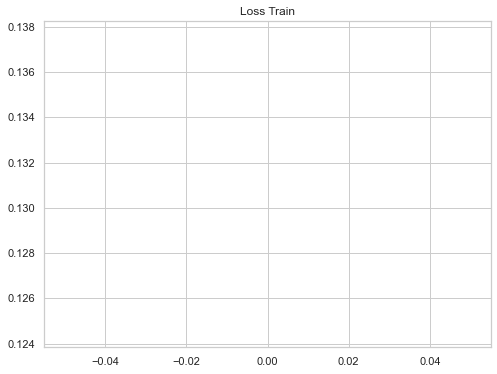

In [53]:
plt.figure(figsize=(8,6))
plt.title('Loss Train')
plt.plot(running_loss)
plt.show()

In [76]:
def evaluate(model, loader):
    model.eval()
    y_pred = []
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for data, label in loader:
            
            data = data.to(device)
        
            label = label.to(device)
            label = label.long()
            
            out = model(data)
            print(out)
            _, predicted = torch.max(out.data, 1)
            y_pred.append(predicted)
            
            total_correct += (predicted == label).sum().item()
            total_samples += label.size(0)
            
    y_pred = torch.cat(y_pred, dim=0)
    accuracy = total_correct / total_samples
    
    return y_pred, accuracy


In [ ]:
y_pred, acc = evaluate(model, dataloader_test)

In [56]:
acc

0.08919959473150962

Vemos que ele não consegue classificar outra classe, é apenas uma, quebrei muito a cabeça sobre o que poderia ser mas não descobri, por isso no dataloader eu coloque o shuffle igual a true pois testei com e sem o shuffle e nada mudava.

In [57]:
y_pred

tensor([3, 3, 3,  ..., 3, 3, 3])

In [59]:
balanced_accuracy_score(dataset_teste['label'].values, y_pred)

0.16666666666666666

In [60]:
print("Report: \n")
print(classification_report(enc.inverse_transform(dataset_teste['label']), enc.inverse_transform(y_pred)))
print('Confusion Matrix: \n')
print(confusion_matrix(dataset_teste['label'], y_pred))

Report: 



C:\Users\Dayvison\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.00      0.00      0.00      4467
                                                                 Credit card       0.00      0.00      0.00      5653
                                                            Credit reporting       0.00      0.00      0.00      9478
Credit reporting, credit repair services, or other personal consumer reports       0.09      1.00      0.16      4402
                                                             Debt collection       0.00      0.00      0.00     14375
                                                                    Mortgage       0.00      0.00      0.00     10975

                                                                    accuracy                           0.09     49350
                                                      

C:\Users\Dayvison\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dayvison\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Rede Bert

In [80]:
data_train

,consumer-message,product,date-received
155592,i pulled my credit file xx xx xxxx and noticed...,1,2015-03-19
97002,i am a credit card account holder with chase m...,1,2015-03-19
88528,in late xx xx xxxx or early xx xx xxxx i recei...,1,2015-03-19
118565,citibank is calling and harassing me i do not ...,1,2015-03-19
36309,mel s harris assoc used deceptive collection p...,1,2015-03-19
...,...,...,...
189870,frankly an opinion formed by direct response f...,3,2017-07-21
194465,this is follow up to a case already filed with...,3,2017-07-21
198190,notified xxxx xx xx xxxx and sent another disp...,3,2017-07-21
189594,they are saying i applied twice for a credit c...,3,2017-07-21


Com tudo isso minha última esperança era uma rede pré-treinada, estou utilizando a BertForSequenceClassification da biblioteca transformers

In [119]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

In [130]:
device = torch.device('cpu')

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=6)
model.to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [121]:
data_test

,consumer-message,product,date-received
135253,a credit card issued by chase bank stated cash...,1,2016-10-03
131195,i went on a cruise with a friends family we ap...,1,2016-10-03
68688,after years of perfect credit with citibank th...,1,2016-10-03
38755,discover closed my credit card account for no ...,1,2016-10-03
3410,citibank recently closed xxxx credit card acco...,1,2016-10-03
...,...,...,...
197183,tried reaching out to experian multiple times ...,3,2017-11-03
196991,my name is xxxx xxxx i have been receiving ale...,3,2017-11-03
197196,i recently submitted a request to xxxx as well...,3,2017-11-03
196903,i am currently refinancing my home and consoli...,3,2017-11-03


Aqui eu passo os textos para o tokenizer do Bert, trunco o tamanho para 64 e crio as máscaras de atenção, após isto passo no DataLoader

In [160]:
train_input_ids = [tokenizer.encode(text, add_special_tokens=True) for text in data_train['consumer-message']]
test_input_ids = [tokenizer.encode(text, add_special_tokens=True) for text in data_test['consumer-message']]

In [161]:
max_length = 64
train_input_ids_ = torch.tensor([i[:max_length] + [0] * (max_length - len(i[:max_length])) for i in train_input_ids])
test_input_ids_ = torch.tensor([i[:max_length] + [0] * (max_length - len(i[:max_length])) for i in test_input_ids])

In [162]:
train_attention_masks = torch.where(train_input_ids_ != 0, torch.tensor(1), torch.tensor(0))
test_attention_masks = torch.where(test_input_ids_ != 0, torch.tensor(1), torch.tensor(0))

In [163]:
train_labels = torch.tensor(data_train['product'].values)
test_labels = torch.tensor(data_test['product'].values)

Não estou utilizando todos os dados pois para o fine-tunning da Bert, estava demorando muitas horas e então limitei para 10000 instâncias para o treino e teste

In [166]:
batch_size = 32
train_dataset = TensorDataset(train_input_ids_, train_attention_masks, train_labels)
train_sampler = RandomSampler(train_dataset, num_samples=10000)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=batch_size)

test_dataset = TensorDataset(test_input_ids_, test_attention_masks, test_labels)
test_sampler = RandomSampler(test_dataset, num_samples=10000)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=batch_size)

Treinando com uma época, o código é o mesmo praticamente, o que muda é a nova adição das máscaras

In [167]:
from tqdm import tqdm

epochs = 1
train_loss_history = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch+1}')
    
    for batch in progress_bar:
        batch = tuple(t.to(device) for t in batch)
        
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2].long()}
        
        optimizer.zero_grad()
        
        outputs = model(**inputs)
        loss = outputs[0]
        total_loss += loss.item()
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        
        optimizer.step()
        
        progress_bar.update(1)
    
    avg_loss = total_loss / len(train_dataloader)
    train_loss_history.append(avg_loss)
    
    print(f'Epoch: {epoch + 1}, Training Loss: {avg_loss:.3f}')


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 313/313 [23:44<00:00,  4.55s/it]

Epoch: 1, Training Loss: 0.792


Aqui o código para termos as predições no conjunto de teste

In [171]:
def evaluate_(model, dataloader):
    model.eval()
    y_pred = []
    y_true = []
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for batch in dataloader:
            
            batch = tuple(t.to(device) for t in batch)
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2].long()}
            
            outputs = model(**inputs)
            logits = outputs.logits
            
            _, predicted = torch.max(logits, dim=1)
            
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(batch[2].cpu().numpy())
            
            total_correct += (predicted == batch[2]).sum().item()
            total_samples += batch[2].size(0)
            
    accuracy = total_correct / total_samples
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    b_acc = balanced_accuracy_score(y_true, y_pred)
    
    return b_acc, accuracy, cm, report


In [172]:
balanced_acc, accuracy, cm, report = evaluate_(model, test_dataloader)

Finalmente tive uma melhora significativa na acc e na distribuição das classificações, acredito que colocando mais épocas eu teria uma melhora, gerando mais intâncias para a classe 2 e 3 também teria uma melhora e claro, colocar mais de 10000 amostras para o treinamento

Eu também poderia ter limpado os textos antes de passar para o tokenizer do bert, retirado as stopwords também

In [173]:
print(f'Acurácia: {accuracy:.3f}')
print(f'\nBalanced Acc: {balanced_acc:.3f}')
print('')
print('Matriz de confusão:\n')
print(cm)
print('Relatório de classificação:\n')
print(report)

Acurácia: 0.757

Balanced Acc: 0.675

Matriz de confusão:
[[ 707   54   21    1   43   70]
 [ 139  761   93   14  116   26]
 [  19   42 1621   23  179   43]
 [   5   19  676   23   68   42]
 [  43   63  284   27 2394  120]
 [  51   20   55    5   66 2067]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76       896
           1       0.79      0.66      0.72      1149
           2       0.59      0.84      0.69      1927
           3       0.25      0.03      0.05       833
           4       0.84      0.82      0.83      2931
           5       0.87      0.91      0.89      2264

    accuracy                           0.76     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.73      0.76      0.73     10000



Vou upar no drive essa pasta para vocês

In [174]:
model.save_pretrained('model')
tokenizer.save_pretrained('model')

('model\\tokenizer_config.json',
 'model\\special_tokens_map.json',
 'model\\vocab.txt',
 'model\\added_tokens.json')